# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
len(df1)

525461

In [3]:
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
len(df2)

541910

## Merging the two sheets

In [4]:
data = pd.concat([df1, df2], ignore_index=True)
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [6]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


## Removing rows with null values

In [7]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
# Drop rows with missing customer id's
data.dropna(subset=['Customer ID'], inplace = True)

In [9]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# Cleaning and Preprocessing

In [10]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,824364.000000,824364,824364.000000,824364.000000
mean,12.414574,2011-01-01 22:29:28.042054144,3.676800,15324.638504
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-06 11:58:00,1.250000,13975.000000
50%,5.000000,2010-12-03 14:26:00,1.950000,15255.000000
75%,12.000000,2011-07-27 15:14:00,3.750000,16797.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,188.976099,NaN,70.241388,1697.464450


In [11]:
# convert InvoiceDate to pandas datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
# Discard rows with zero and negative quantity values
data = data[data['Quantity'] > 0].copy()

In [13]:
# New column TotalPrice, qty * unit price
data['TotalPrice'] = data['Quantity'] * data['Price']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [14]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,805620.000000,805620,805620.000000,805620.000000,805620.000000
mean,13.307665,2011-01-02 10:26:35.704326144,3.206279,15331.856250,22.024564
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,2.000000,2010-07-07 12:08:00,1.250000,13982.000000,4.950000
50%,5.000000,2010-12-03 15:10:00,1.950000,15271.000000,11.850000
75%,12.000000,2011-07-28 13:28:00,3.750000,16805.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000
std,144.306739,NaN,29.197901,1696.768395,224.032150


# Feature Engineering

In [15]:
customer_df = data.groupby('Customer ID').agg({
    'Invoice': 'nunique',  # purchase frequency
    'InvoiceDate': ['min', 'max'],  # time span
    'TotalPrice': 'sum',  # total revenue
    'Country': 'first'
})

In [16]:
# Flatten MultiIndex columns
customer_df.columns = ['Purchases', 'FirstPurchase', 'LastPurchase', 'TotalSpent', 'Country']
customer_df['CustomerAgeDays'] = (customer_df['LastPurchase'] - customer_df['FirstPurchase']).dt.days + 1
customer_df['AvgSpentPerPurchase'] = customer_df['TotalSpent'] / customer_df['Purchases']

In [17]:
customer_df.head()

,Purchases,FirstPurchase,LastPurchase,TotalSpent,Country,CustomerAgeDays,AvgSpentPerPurchase
Customer ID,,,,,,,
12346.0,12,2009-12-14 08:34:00,2011-01-18 10:01:00,77556.46,United Kingdom,401,6463.038333
12347.0,8,2010-10-31 14:20:00,2011-12-07 15:52:00,5633.32,Iceland,403,704.165000
12348.0,5,2010-09-27 14:59:00,2011-09-25 13:13:00,2019.40,Finland,363,403.880000
12349.0,4,2010-04-29 13:20:00,2011-11-21 09:51:00,4428.69,Italy,571,1107.172500
12350.0,1,2011-02-02 16:01:00,2011-02-02 16:01:00,334.40,Norway,1,334.400000


In [18]:
customer_df.describe()

,Purchases,FirstPurchase,LastPurchase,TotalSpent,CustomerAgeDays,AvgSpentPerPurchase
count,5881.000000,5881,5881,5881.000000,5881.000000,5881.000000
mean,6.287196,2010-08-22 07:16:55.031457280,2011-05-22 13:18:31.749702400,3017.076888,273.883183,391.518233
min,1.000000,2009-12-01 07:45:00,2009-12-01 09:55:00,0.000000,1.000000,0.000000
25%,1.000000,2010-02-09 14:17:00,2010-11-25 10:11:00,347.800000,1.000000,181.390000
50%,3.000000,2010-06-27 13:29:00,2011-09-05 11:52:00,897.620000,221.000000,284.984000
75%,7.000000,2011-01-30 14:36:00,2011-11-14 11:33:00,2304.180000,512.000000,420.500000
max,398.000000,2011-12-09 12:16:00,2011-12-09 12:50:00,608821.650000,739.000000,84236.250000
std,13.012879,NaN,NaN,14734.128619,258.815005,1214.783901


## EDA on customer data

### Total Spent Distribution

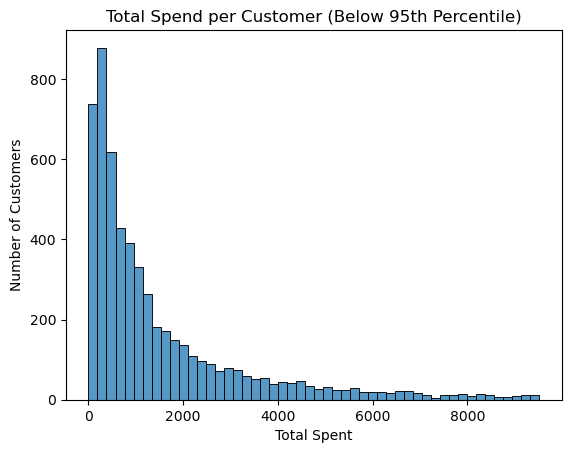

In [19]:
# Cap extremes
cap = customer_df['TotalSpent'].quantile(0.95)

sns.histplot(customer_df[customer_df['TotalSpent'] < cap]['TotalSpent'], bins=50)
plt.title("Total Spend per Customer (Below 95th Percentile)")
plt.xlabel("Total Spent")
plt.ylabel("Number of Customers")
plt.show()

### Number of Purchases Distribution

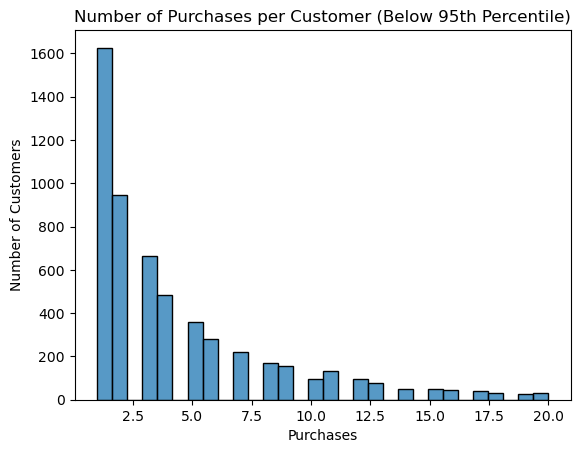

In [20]:
cap = customer_df['Purchases'].quantile(0.95)

sns.histplot(customer_df[customer_df['Purchases'] < cap]['Purchases'], bins=30)
plt.title("Number of Purchases per Customer (Below 95th Percentile)")
plt.xlabel("Purchases")
plt.ylabel("Number of Customers")
plt.show()

### Customer Lifespan (Days Active)

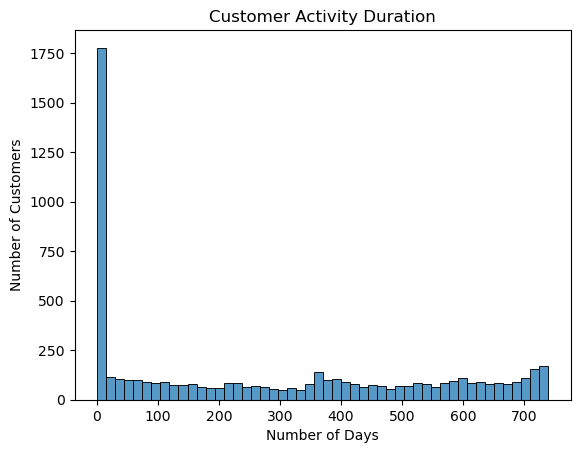

In [21]:
sns.histplot(customer_df['CustomerAgeDays'], bins=50)
plt.title("Customer Activity Duration")
plt.xlabel("Number of Days")
plt.ylabel("Number of Customers")
plt.show()

### Average Spend per Purchase Distribution

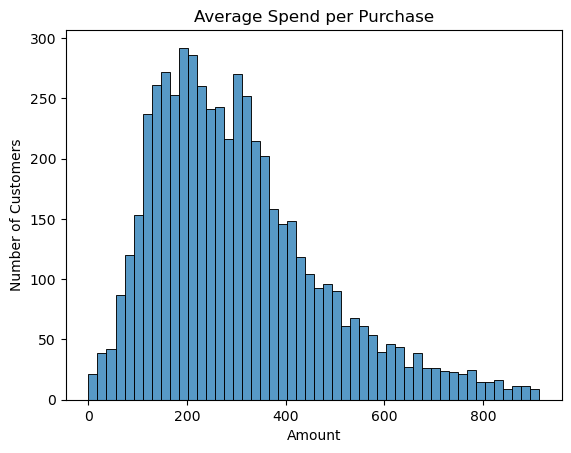

In [22]:
cap = customer_df['AvgSpentPerPurchase'].quantile(0.95)

sns.histplot(customer_df[customer_df['AvgSpentPerPurchase'] < cap]['AvgSpentPerPurchase'], bins=50)
plt.title("Average Spend per Purchase")
plt.xlabel("Amount")
plt.ylabel("Number of Customers")
plt.show()

### Top Countries by Total Spend

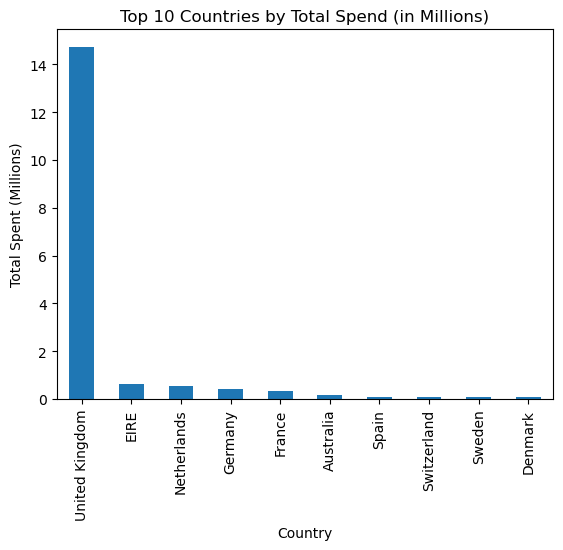

In [23]:
top_countries = customer_df.groupby('Country')['TotalSpent'].sum().sort_values(ascending=False).head(10)
top_countries_million = top_countries / 1_000_000  # Convert to millions

top_countries_million.plot(kind='bar')
plt.title("Top 10 Countries by Total Spend (in Millions)")
plt.xlabel("Country")
plt.ylabel("Total Spent (Millions)")
plt.show()

### Purchases vs Total Spent

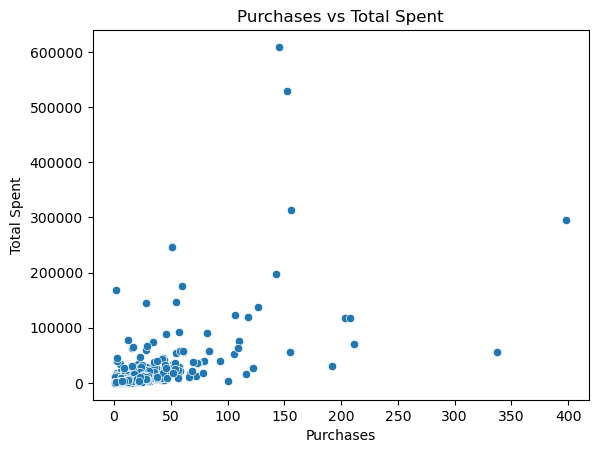

In [24]:
sns.scatterplot(x='Purchases', y='TotalSpent', data=customer_df)
plt.title("Purchases vs Total Spent")
plt.xlabel("Purchases")
plt.ylabel("Total Spent")
plt.show()

# Creating the prediction target

## Creating training and future data

In [25]:
# cutoff data is 9 months from the start of data
cutoff_date = data['InvoiceDate'].min() + pd.DateOffset(months=9)

In [26]:
train_data = data[data['InvoiceDate'] <= cutoff_date] # till cutoff
future_data = data[data['InvoiceDate'] > cutoff_date] # after cutoff

### Aggregating per customer

In [27]:
train_agg = train_data.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'TotalPrice': 'sum',
    'InvoiceDate': ['min', 'max']
})

train_agg.columns = ['Purchases', 'TotalSpent', 'FirstPurchase', 'LastPurchase']
train_agg['CustomerAgeDays'] = (train_agg['LastPurchase'] - train_agg['FirstPurchase']).dt.days + 1
train_agg['AvgSpentPerPurchase'] = train_agg['TotalSpent'] / train_agg['Purchases']

In [28]:
future_agg = future_data.groupby('Customer ID')['TotalPrice'].sum().reset_index()
future_agg.columns = ['Customer ID', 'FutureSpent']

### Merging train features with future labels

In [29]:
train_final = train_agg.reset_index().merge(future_agg, on='Customer ID', how='inner')

In [30]:
train_final

,Customer ID,Purchases,TotalSpent,FirstPurchase,LastPurchase,CustomerAgeDays,AvgSpentPerPurchase,FutureSpent
0,12346.0,11,372.86,2009-12-14 08:34:00,2010-06-28 13:53:00,197,33.896364,77183.60
1,12349.0,2,1268.52,2010-04-29 13:20:00,2010-05-18 09:57:00,19,634.260000,3160.17
2,12355.0,1,488.21,2010-05-21 11:59:00,2010-05-21 11:59:00,1,488.210000,459.40
3,12358.0,2,1697.93,2009-12-08 07:59:00,2010-06-07 12:28:00,182,848.965000,2189.14
4,12359.0,5,2012.03,2009-12-05 13:32:00,2010-06-22 10:24:00,199,402.406000,6923.91
...,...,...,...,...,...,...,...,...
2502,18276.0,3,683.67,2009-12-10 17:14:00,2010-07-08 09:15:00,210,227.890000,972.85
2503,18277.0,2,337.14,2010-08-02 10:26:00,2010-08-02 10:27:00,1,168.570000,842.91
2504,18281.0,1,120.32,2010-05-11 10:49:00,2010-05-11 10:49:00,1,120.320000,80.82
2505,18283.0,4,446.42,2010-02-19 17:16:00,2010-08-19 13:04:00,181,111.605000,2290.23


# Model training and evaluation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, r2_score

X = train_final.drop(columns=['Customer ID', 'FutureSpent', 'FirstPurchase', 'LastPurchase'])
y = train_final['FutureSpent']  # No log-transform

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)
ridge_rmse = root_mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print("Ridge Regression:")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R² Score: {ridge_r2:.4f}")
print()

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
lasso_rmse = root_mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print("Lasso Regression:")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"R² Score: {lasso_r2:.4f}")

Ridge Regression:
RMSE: 6893.64
R² Score: 0.4563

Lasso Regression:
RMSE: 6893.66
R² Score: 0.4563
